In [386]:
%pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [387]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [388]:
df = pd.read_csv("linear_regression/housing_prices_prediction/dataset/dataset.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [390]:
df['Null_Count'] = df.isnull().sum(axis=1)
rows_with_nulls = df[df['Null_Count']>0]
rows_with_nulls

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Null_Count


In [391]:
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for column in categorical_columns:
    df[column] = df[column].map({'yes':1,'no':0})

In [392]:
categorical_columns = ['furnishingstatus']
for column in categorical_columns:
    df[column] = df[column].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

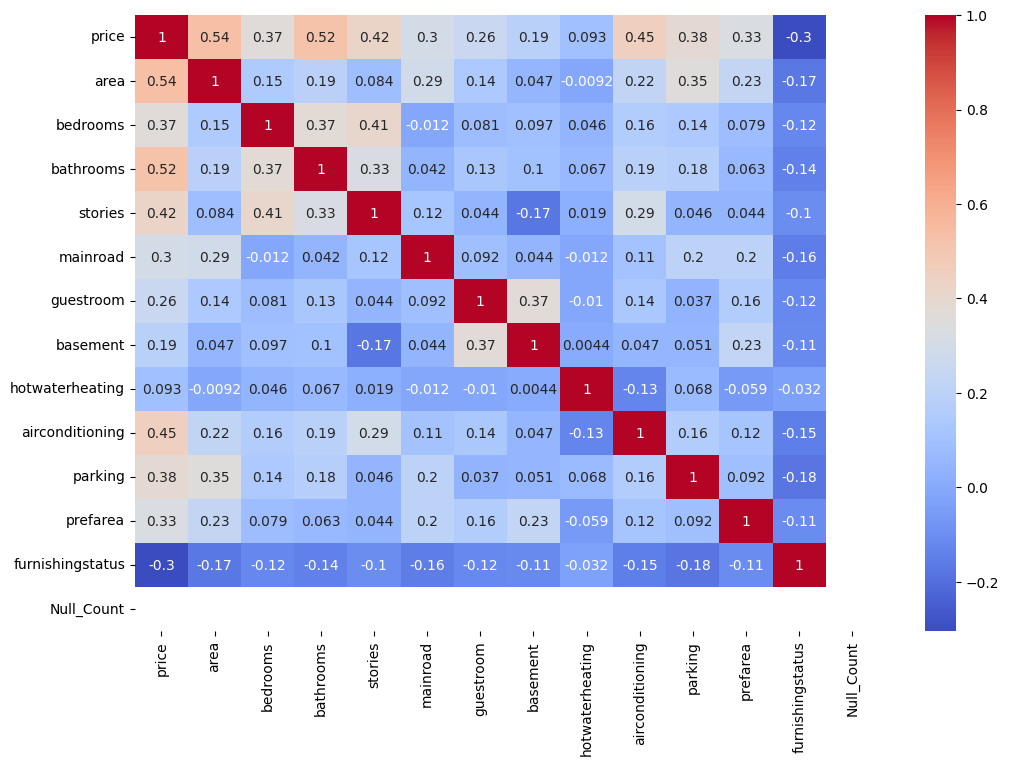

In [393]:
import seaborn as sns
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)
plt.show()

In [394]:
X = df[['basement','hotwaterheating','area', 'bathrooms', 'stories', 'airconditioning', 'parking','prefarea','bedrooms','mainroad','guestroom']]
y = df['price']

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [396]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [397]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("R2 score:",r2)

Mean Squared Error: 1800793719718.8762
R2 score: 0.6437296086614297


In [398]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

            Feature   Coefficient
0          basement  4.350055e+05
1   hotwaterheating  7.122647e+05
2              area  2.377105e+02
3         bathrooms  1.109326e+06
4           stories  4.269096e+05
5   airconditioning  8.084154e+05
6           parking  2.474431e+05
7          prefarea  6.367877e+05
8          bedrooms  7.848365e+04
9          mainroad  4.126778e+05
10        guestroom  2.436064e+05


In [399]:

df['area_bathrooms'] = df['area'] * df['bathrooms']
df['area_stories'] = df['area'] * df['stories']
df['area_airconditioning'] = df['area'] * df['airconditioning']
df['stories_airconditioning'] = df['stories'] * df['airconditioning']
df['parking_prefarea'] = df['parking'] * df['prefarea']
df['guestroom_prefarea'] = df['guestroom'] * df['prefarea']
df['bathrooms_bedrooms'] = df['bathrooms'] * df['bedrooms']
df['basement_hotwaterheating'] = df['basement'] * df['hotwaterheating']

df['area_prefarea'] = df['area'] * df['prefarea']
df['area_bedrooms_parking'] = df['area'] * df['bedrooms'] * df['parking']
df['area_basement'] = df['area'] * df['basement']
df['mainroad_bathrooms_airconditioning'] = df['mainroad'] * df['bathrooms'] * df['airconditioning']
df['parking_guestroom'] = df['parking'] * df['guestroom']
df['airconditioning_prefarea'] = df['airconditioning'] * df['prefarea']
df['hotwaterheating_guestroom'] = df['hotwaterheating'] * df['guestroom']

X = df[['area_prefarea','area_bedrooms_parking','area_basement','mainroad_bathrooms_airconditioning','parking_guestroom','airconditioning_prefarea','hotwaterheating_guestroom','area_bathrooms','area_airconditioning','stories_airconditioning','parking_prefarea','bathrooms_bedrooms','basement_hotwaterheating','basement','hotwaterheating','area', 'bathrooms', 'stories', 'parking','prefarea','bedrooms','mainroad','guestroom']]
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1742004547930.15
R2 Score: 0.6553605028667413


In [400]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                               Feature   Coefficient
0                        area_prefarea  5.963880e+01
1                area_bedrooms_parking  4.237051e-01
2                        area_basement  5.254801e+01
3   mainroad_bathrooms_airconditioning  4.872430e+05
4                    parking_guestroom  1.306418e+05
5             airconditioning_prefarea  6.353986e+04
6            hotwaterheating_guestroom -8.849235e+05
7                       area_bathrooms  1.044247e+02
8                 area_airconditioning  2.501862e+01
9              stories_airconditioning  8.028089e+04
10                    parking_prefarea  1.460676e+04
11                  bathrooms_bedrooms  1.048775e+05
12            basement_hotwaterheating  1.103837e+06
13                            basement  1.768584e+05
14                     hotwaterheating  5.009613e+05
15                                area  4.424050e+01
16                           bathrooms -3.387988e+04
17                             stories  3.4712

In [401]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [402]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [403]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1742004547930.1516
R² Score: 0.655360502866741


In [404]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores.mean())

Cross-Validation R² Scores: -9.42958829023099


In [405]:
X = X.drop(columns=['hotwaterheating_guestroom', 'parking_prefarea','bathrooms','bedrooms','guestroom','basement','bathrooms_bedrooms'])

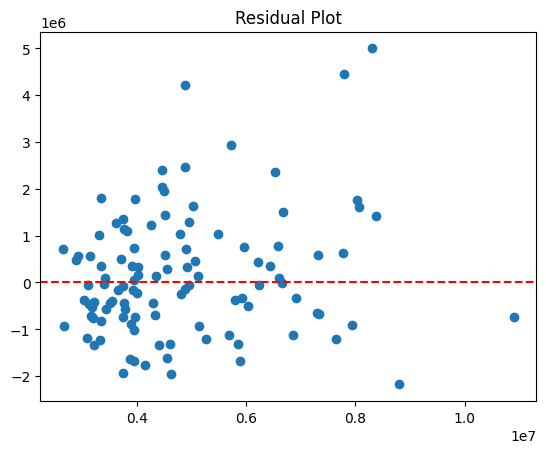

In [406]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [407]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [408]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
print("Updated CV R2 Scores:", scores.mean())

Updated CV R2 Scores: 0.6682735718742194


d:\Programming\Machine Learning\Machine Learning Basics\machine_learning_algorithms_basics\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
